# StackOverflow Analysis: Milestone 1

In [14]:
### Imports, functions and global variables
import sys
import os
import re
from bs4 import BeautifulSoup as Soup
from collections import Counter
from collections import defaultdict
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
#import pyspark
#import numpy as np
#from pyspark import SparkContext
#from pyspark.mllib.fpm import FPGrowth

#SparkContext.setSystemProperty('spark.executor.memory','3g')
#sc = pyspark.SparkContext('local[*]')

## Global variables

totalquestions=0
totalQuestionswithacceptedanswers=0
totalQuestionswithnoacceptedanswers=0
bodydict=dict()

posts_by_tag = defaultdict()
tags_by_year = defaultdict()
tags_by_post_id = defaultdict()
userdict=dict()
tags=list()

acceptedanswers=list()
bestuser=list()

def populate_posts_by_tag(tag,post_id):
    global posts_by_tag
    if tag == '':
        return
    if post_id == '':
        return

    if tag not in posts_by_tag:
        posts_by_tag[tag] = set()
    posts_by_tag[tag].add(int(post_id))

def populate_tags_by_post_id(id,tag):
    global tags_by_post_id
    if tag == '':
        return
    if id == '':
        return

    if id not in tags_by_post_id:
        tags_by_post_id[id] = list()
    tags_by_post_id[id].append(tag)
    
def populate_tags_by_year(tag,year):
    global tags_by_year
    if tag == '':
        return
    if year == '':
        return

    if tag not in tags_by_year:
        tags_by_year[tag] = list()
    tags_by_year[tag].append(year)

def plot_tags(tagCount):
    
    x,y = zip(*tagCount)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]   

    area = [i/100 for i in list(y)]   # 0 to 15 point radiuses
    plt.figure(figsize=(8,8))
    plt.ylabel("Number of question associations")
    for i in range(len(y)):
        plt.plot(i+0.5,y[i], marker='o', linestyle='',ms=area[i],label=x[i])

    plt.legend(numpoints=1)
    plt.show()
    
def parse_posts(file):
    global totalquestions,totalQuestionswithacceptedanswers,totalQuestionswithnoacceptedanswers,bodydict

    count=0
    with open(file, encoding='utf8') as handler:
        soup = Soup(handler,"html.parser")
        for message in soup.findAll('row'):
            msg_attrs = dict(message.attrs)
            id = msg_attrs['id']     
            
            if 'body' in msg_attrs:
                #id=(msg_attrs[u'id'])
                body=(msg_attrs[u'body'])
                bodydict[id]=Soup(body,"html.parser").getText()

            if 'tags' in msg_attrs:
                year =  msg_attrs['creationdate'].split("-")[0]
                #print(year)
                msg_attrs=(msg_attrs[u'tags'].replace('<','').replace('>',','))
                for msg in msg_attrs.split(','):
                    tags.append(msg)
                    populate_posts_by_tag(msg,id)
                    populate_tags_by_year(msg,year)
                    populate_tags_by_post_id(id,msg)
            
            msg_attrs = dict(message.attrs)
            posttypeid = msg_attrs['posttypeid']
            
            if posttypeid == "1":
                totalquestions+=1
                if 'acceptedanswerid' in msg_attrs:
                    totalQuestionswithacceptedanswers+=1
                    acceptedanswerid = msg_attrs['acceptedanswerid']
                    acceptedanswers.append(acceptedanswerid)
                else:
                    totalQuestionswithnoacceptedanswers+=1
            else:
                if id in acceptedanswers and 'owneruserid' in msg_attrs:
                     bestuser.append(msg_attrs['owneruserid'])
                    
                #count=count+1

            # if count == 5:
            #     break
            
def parse_users(file):
    global userdict
    count=0
    with open(file, encoding='utf8') as handler:
        soup = Soup(handler,"html.parser")
        for message in soup.findAll('row'):
            msg_attrs = dict(message.attrs)
            id=(msg_attrs[u'id'])
            username=(msg_attrs[u'displayname'])
            userdict[id]=username                   

In [ ]:
parse_posts("C:\\Users\\samym\\Downloads\\programmers.stackexchange.com\\Posts.xml")
tags=list(filter(None, tags))
counts=dict()

top_20_words = Counter(tags).most_common(20)
print("Top 20 most common tags, and the number of their occurences :", top_20_words)

In [45]:
print(len(bodydict))

178483


In [16]:
#print body
count=0
for k,v in bodydict.items():
    print(v)
    count+=1
    if count > 1:
        break

A coworker of mine believes that any use of in-code comments (ie, not javadoc style method or class comments) is a code smell.  What do you think?

Ideally, code should be so well coded that it should be auto explicative. In the real world, we know that also very high quality code needs sometimes commenting.
What you should absolutely avoid is "comment-code redundancy" (comments that don't add anything to code):
i++; // Increment i by 1

Then, if there's a good (and maintained/aligned) code design and documentation, commenting is even less useful.
But in some circumstances comments can be a good aid in code readability:
while( foo )
{
     if( dummy )
     {
     }
     else // !dummy
     {
     }
} // end while( foo )

Don't forget that you have to maintain and keep in sync also comments... outdated or wrong comments can be a terrible pain! And, as a general rule, commenting too much can be a symptom of bad programming.



In [23]:
import nltk
#nltk.download()
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

# Inspect top 20 tags for this data set.

Each post on the website can be associated with multiple tags, which classify the post into a broad topic/category.
By counting tag occurences, we determine the top 20 tags. This reflects the popularity of programming topics that users have questions about on the website.

In [42]:
totalvocab_stemmed = []
totalvocab_tokenized = []

for k,v in bodydict.items():
    allwords_stemmed = tokenize_and_stem(v)
    totalvocab_stemmed.extend(allwords_stemmed)
    allwords_tokenized = tokenize_only(v)
    totalvocab_tokenized.extend(allwords_tokenized)

In [43]:
print(totalvocab_stemmed[4])

believ


In [35]:
i=0
while i < 10:
    print(totalvocab_tokenized[i])
    i+=1

a
coworker
of
mine
believes
that
any
use
of
in-code


In [47]:
import pandas as pd
#vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
df=pd.DataFrame(list(bodydict.items()))

In [57]:
i=0
testdict=dict()
for k,v in bodydict.items():
    testdict[k]=v
    i+=1
    if i == 1000:
        break

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(set(testdict.values()))

print(tfidf_matrix.shape)

Wall time: 2.33 s
(1000, 714)


In [84]:
terms = tfidf_vectorizer.get_feature_names()
print (terms)

["'d", "'m", "'m sure", "'s", "'s code", "'s easier", "'s good", "'s import", '.net', 'abil', 'abl', 'abov', 'accept', 'access', 'account', 'accur', 'activ', 'actual', 'ad', 'add', 'addit', 'advanc', 'advantag', 'advic', 'affect', 'ago', 'agre', 'algorithm', 'allow', 'alreadi', 'alway', 'ani', 'annoy', 'anoth', 'answer', 'anyon', 'anyth', 'api', 'app', 'appear', 'appli', 'applic', 'approach', 'architectur', 'area', 'argu', 'argument', 'articl', 'ask', 'aspect', 'assign', 'assum', 'attempt', 'author', 'avail', 'avoid', 'away', 'background', 'bad', 'base', 'basic', 'becaus', "becaus 's", 'becom', 'befor', 'begin', 'believ', 'benefit', 'best', 'better', 'big', 'bigger', 'biggest', 'bit', 'block', 'blog', 'book', 'boss', 'brace', 'break', 'browser', 'bug', 'build', 'busi', 'c', 'c c++', 'c++', 'ca', "ca n't", 'came', 'care', 'career', 'case', 'catch', 'caus', 'certain', 'challeng', 'chanc', 'chang', 'charact', 'check', 'choic', 'choos', 'claim', 'class', 'clear', 'click', 'client', 'close'

In [85]:

from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 2.18 s


In [86]:
import pandas as pd

films = { 'body': set(testdict.values()), 'cluster': clusters }

frame = pd.DataFrame(films, index = [clusters] , columns = ['body', 'cluster'])

In [87]:
frame['cluster'].value_counts()

4    437
2    183
0    175
3    160
1     45
Name: cluster, dtype: int64

In [91]:
from __future__ import print_function

print("Top terms per cluster:")
print()
order_centroids = clusters.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for body in frame.ix[i]['body'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:



AttributeError: 'list' object has no attribute 'argsort'

#### Exploratory analysis of users and questions on programmers.stackexchange.com 

In [5]:
import json
parse_users("programmers.stackexchange.com/Users.xml")   
path2=os.path.join(os.getcwd(),'preprocesseddata', 'users.txt')
file=open(path2,'w',encoding="UTF8")
json.dump(userdict, file)
file.close()

In [6]:
path2=os.path.join(os.getcwd(),'preprocesseddata', 'users.txt')
allusers= json.load(open(path2))
print("Total number of users: ", len(allusers))

Total number of users:  208279


In [7]:
print("Total Questions asked ", totalquestions)
print("Questions with accepted answers ", totalQuestionswithacceptedanswers)
print("Questions with no accepted answers ", totalQuestionswithnoacceptedanswers)

Total Questions asked  42782
Questions with accepted answers  25280
Questions with no accepted answers  17502


In [36]:
print("Top 20 Users with most accepted answers:")
for x,y in Counter(bestuser).most_common(20):
    print(allusers[x],":",y,"accepted answers")

Top 20 Users with most accepted answers:
Robert Harvey : 575 accepted answers
Doc Brown : 470 accepted answers
Arseni Mourzenko : 381 accepted answers
Bart van Ingen Schenau : 347 accepted answers
Karl Bielefeldt : 323 accepted answers
Kilian Foth : 248 accepted answers
Telastyn : 235 accepted answers
Thomas Owens : 232 accepted answers
amon : 213 accepted answers
GlenH7 : 210 accepted answers
gbjbaanb : 190 accepted answers
Jörg W Mittag : 170 accepted answers
pdr : 157 accepted answers
Mason Wheeler : 141 accepted answers
Ixrec : 129 accepted answers
Péter Török : 127 accepted answers
tdammers : 123 accepted answers
Michael Borgwardt : 121 accepted answers
Yannis : 119 accepted answers
Euphoric : 113 accepted answers


#### Visualization of the top 10 tags in the stackexchange data set.

[('java', 3511), ('c#', 3007), ('design', 2886), ('design-patterns', 2475), ('object-oriented', 2036), ('c++', 1822), ('algorithms', 1732), ('php', 1667), ('architecture', 1639), ('javascript', 1578)]


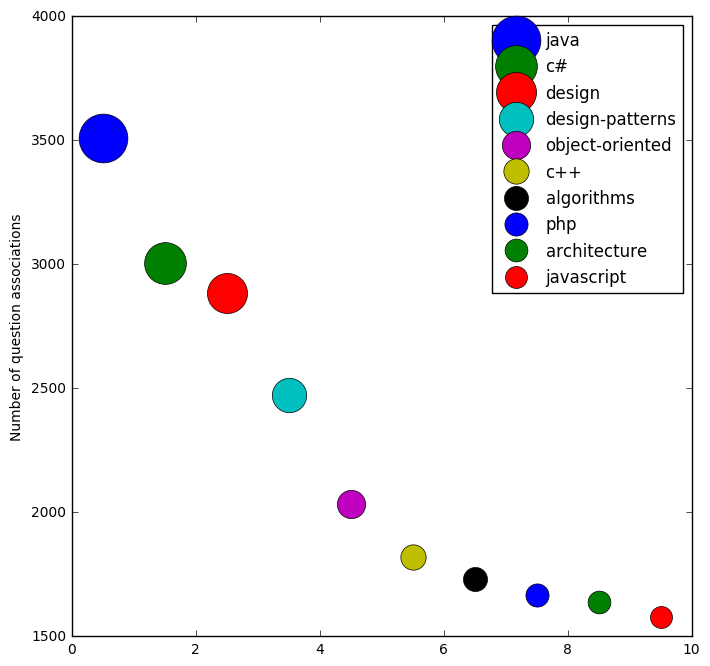

In [9]:
import collections
import numpy as np
tagCount =  collections.Counter(list(tags)).most_common(10)
print(tagCount)
plot_tags(tagCount)

#### Plot popularity of top 10 tags over recent years

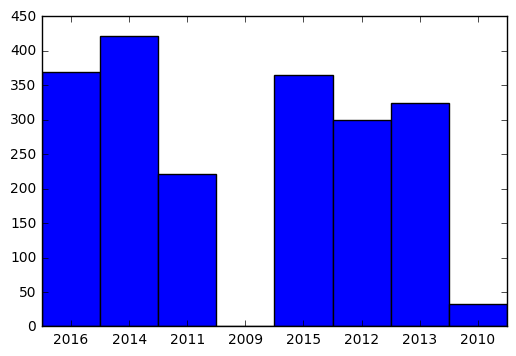

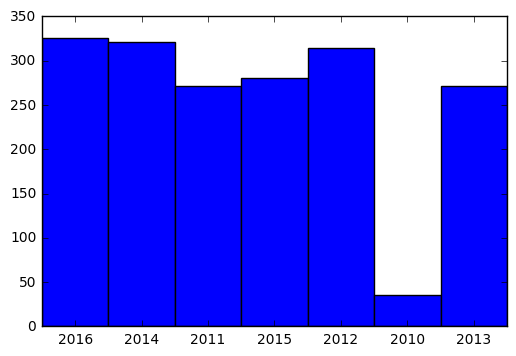

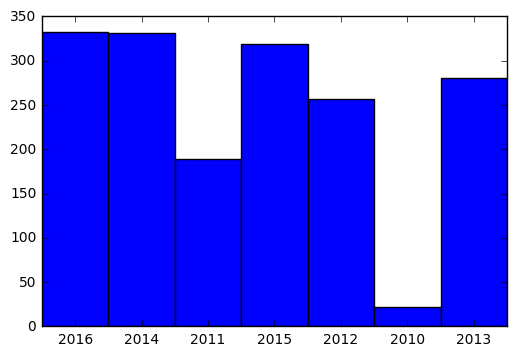

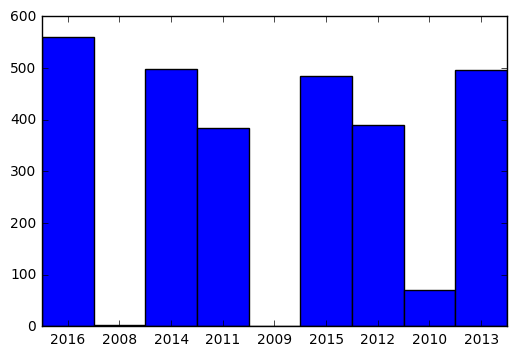

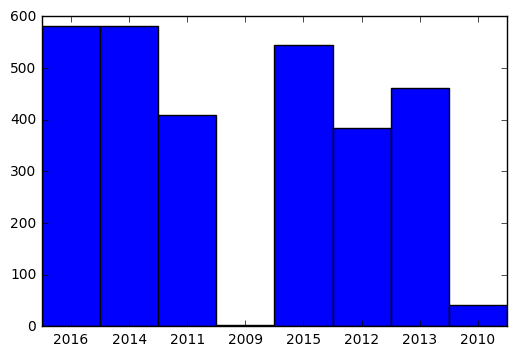

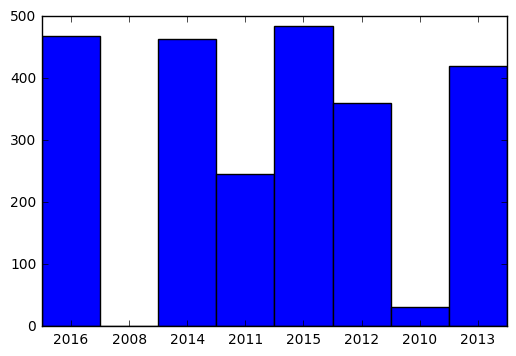

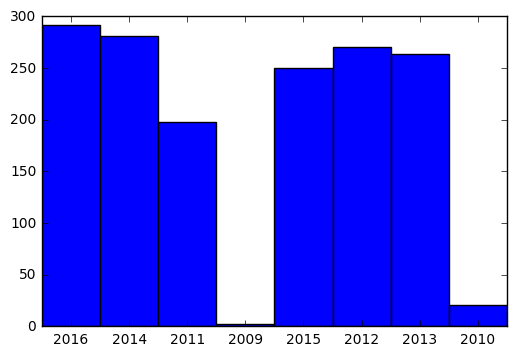

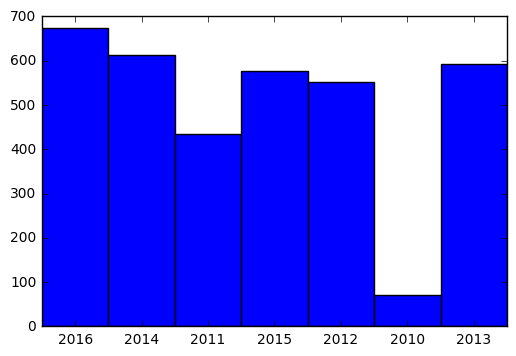

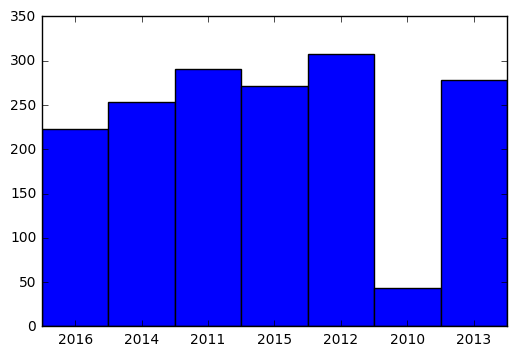

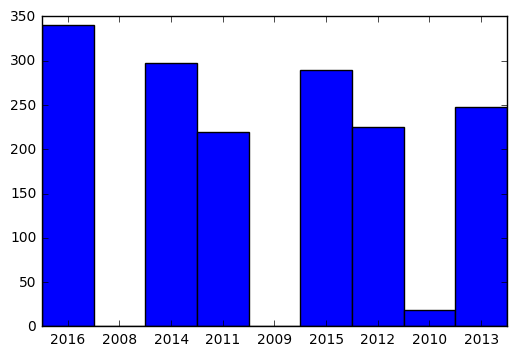

In [11]:
top_10_dict = dict()
for key in tagCount:
    top_10_dict[key[0]] = Counter(tags_by_year[key[0]])
    
for tag in top_10_dict:
    labels, values = zip(*top_10_dict[tag].items())
    indexes = np.arange(len(labels))
    width = 1
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    plt.show()

#### Frequent Item Sets analysis for tags

In [12]:
import csv
fp = open("output.txt", "w")
for key, val in tags_by_post_id.items():
    fp.write(' '.join(str(e) for e in val))
    fp.write("\n")

data = sc.textFile("output.txt")
transactions = data.map(lambda line: line.strip().split(' '))
model = FPGrowth.train(transactions, minSupport=0.005, numPartitions=2)
result = sorted(model.freqItemsets().collect(), reverse=True)


NameError: name 'result_2' is not defined

In [13]:
print(len(result))
# Print only frequent item sets with >1
for fi in result:
    if len(fi.items)> 1:
        print(fi)

113
FreqItemset(items=['testing', 'unit-testing'], freq=258)
FreqItemset(items=['tdd', 'unit-testing'], freq=240)
FreqItemset(items=['scrum', 'agile'], freq=316)
FreqItemset(items=['open-source', 'licensing'], freq=320)
FreqItemset(items=['object-oriented-design', 'object-oriented'], freq=225)
FreqItemset(items=['object-oriented-design', 'design-patterns'], freq=257)
FreqItemset(items=['object-oriented', 'java'], freq=289)
FreqItemset(items=['object-oriented', 'design-patterns'], freq=390)
FreqItemset(items=['object-oriented', 'design'], freq=353)
FreqItemset(items=['gpl', 'licensing'], freq=352)
FreqItemset(items=['design-patterns', 'java'], freq=303)
FreqItemset(items=['design-patterns', 'design'], freq=475)
FreqItemset(items=['design-patterns', 'c#'], freq=279)
FreqItemset(items=['design', 'java'], freq=307)
FreqItemset(items=['design', 'c#'], freq=257)
FreqItemset(items=['database-design', 'database'], freq=218)
FreqItemset(items=['c', 'c++'], freq=226)
FreqItemset(items=['architec

In [37]:
def get_top_co_occurences(str_tag, result_freq_items):
    co_occurence_list = []
    for fi in result_freq_items:
        if str_tag in fi.items:
            co_occurence_list.append((fi.items, fi.freq))
    co_author_list1 = sorted(co_occurence_list, key=lambda x: x[1], reverse=True)
    print("Top 5 tag co-occurrences, along with frequencies, for the tag "+ str_tag + " are -")
    for auth in co_author_list1[1:6]:
        print(auth) 

We can now find co-occurences for the top 10 tags we found at the beginning of the analysis

In [38]:
for key in tagCount:
    get_top_co_occurences(key[0],result)

Top 5 tag co-occurrences, along with frequencies, for the tag java are -
(['design', 'java'], 307)
(['design-patterns', 'java'], 303)
(['object-oriented', 'java'], 289)
Top 5 tag co-occurrences, along with frequencies, for the tag c# are -
(['.net', 'c#'], 452)
(['design-patterns', 'c#'], 279)
(['design', 'c#'], 257)
Top 5 tag co-occurrences, along with frequencies, for the tag design are -
(['design-patterns', 'design'], 475)
(['object-oriented', 'design'], 353)
(['architecture', 'design'], 345)
(['design', 'java'], 307)
(['design', 'c#'], 257)
Top 5 tag co-occurrences, along with frequencies, for the tag design-patterns are -
(['design-patterns', 'design'], 475)
(['object-oriented', 'design-patterns'], 390)
(['design-patterns', 'java'], 303)
(['design-patterns', 'c#'], 279)
(['object-oriented-design', 'design-patterns'], 257)
Top 5 tag co-occurrences, along with frequencies, for the tag object-oriented are -
(['object-oriented', 'design-patterns'], 390)
(['object-oriented', 'design']

As we see, not many co-occurences are captured at this minsupport. 
Also, the tags "javascript","algorithms","php" does not have any associated tags, it occurs by itself. We will be able to see more co-occurences if we decrease the minsupport.